In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station= Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
recent_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

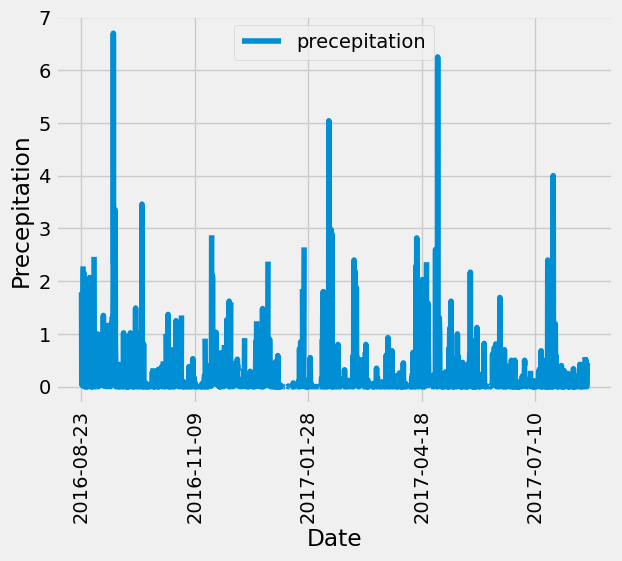

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_year= dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
prev_year= recent_year- dt.timedelta(days=365)
prev_year
# Perform a query to retrieve the data and precipitation scores
results= []
results= session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df= pd.DataFrame(results,columns=['date','precepitation'])
prcp_df.set_index(prcp_df['date'],inplace=True)
#print(prcp_df.to_string(index=False))

# Sort the dataframe by date
prcp_df=prcp_df.sort_index()
# print(prcp_df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.xlabel("Date")
plt.ylabel("Precepitation")
plt.xticks(rotation='vertical')
# plt.figure(figsize=(10,6))


In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precepitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
station= session.query(Station).count()
station

9

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_val= session.query(Measurement.station, \
                        func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
station_val


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats_station= session.query(func.min(Measurement.tobs)\
                       ,func.max(Measurement.tobs),func.avg(Measurement.tobs))\
                       .filter(Measurement.station=='USC00519281').all()

stats_station


[(54.0, 85.0, 71.66378066378067)]

     tobs
0    77.0
1    80.0
2    80.0
3    75.0
4    73.0
..    ...
346  77.0
347  77.0
348  76.0
349  76.0
350  79.0

[351 rows x 1 columns]


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

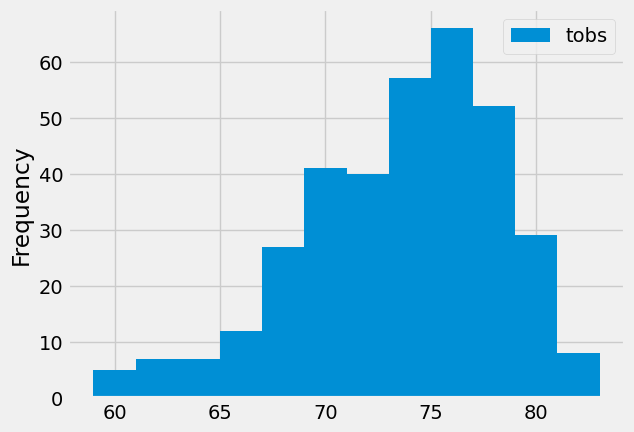

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results_temp = session.query(Measurement.tobs).\
    filter((Measurement.station == 'USC00519281') &\
    (Measurement.date > prev_year)).all()

tobs_df= pd.DataFrame(results_temp,columns=['tobs'])
print(tobs_df)

tobs_df.plot.hist(bins=12)
plt.tight_layout

# Close Session

In [22]:
# Close Session
session.close()